In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df= pd.read_csv('data/StudentPerformance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.isna().sum() #No null values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [25]:
df.columns=(df.columns
            .str.strip()
            .str.lower()
            .str.replace(r'[^a-z0-9_]+','_',regex=True)
)
df

,hours_studied,previous_scores,extracurricular_activities,sleep_hours,sample_question_papers_practiced,performance_index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


##### Scatter Plot

In [30]:
df.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

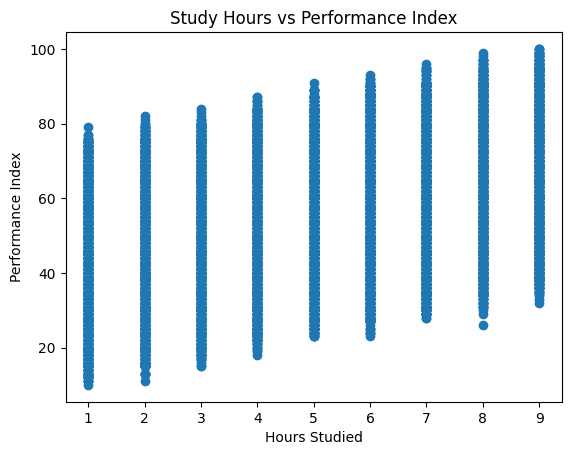

In [33]:
plt.scatter(df['hours_studied'],df['performance_index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Study Hours vs Performance Index')
plt.show()

#Here when hours_studied increases, performance index increases

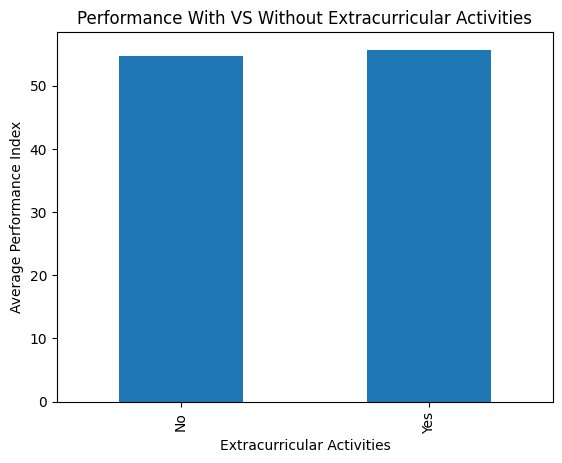

In [52]:
avg_performance= df.groupby('extracurricular_activities')['performance_index'].mean()

plt.figure()
avg_performance.plot(kind="bar")
plt.xlabel('Extracurricular Activities')
plt.ylabel('Average Performance Index')
plt.title('Performance With VS Without Extracurricular Activities')
plt.show()

In [57]:
good= df[(df['hours_studied']>5) & (df['sleep_hours']>6)]
bad= df[(df['hours_studied']<5) & (df['sleep_hours']>6)]

In [58]:
avg_good = good['performance_index'].mean()
avg_bad= bad['performance_index'].mean()

In [60]:
diff= avg_good- avg_bad

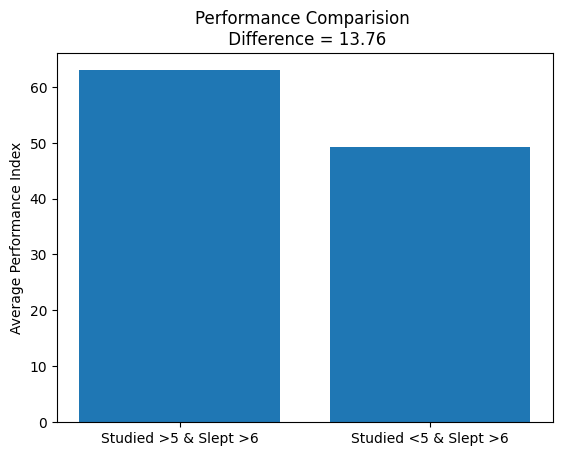

In [69]:
plt.bar(
    ["Studied >5 & Slept >6", "Studied <5 & Slept >6"],
    [avg_good, avg_bad])
plt.ylabel('Average Performance Index')
plt.title(f'Performance Comparision \n Difference = {diff:.2f}')
plt.show()

In [71]:
study_corr = df['hours_studied'].corr(df['performance_index'])
sleep_corr = df['sleep_hours'].corr(df['performance_index'])

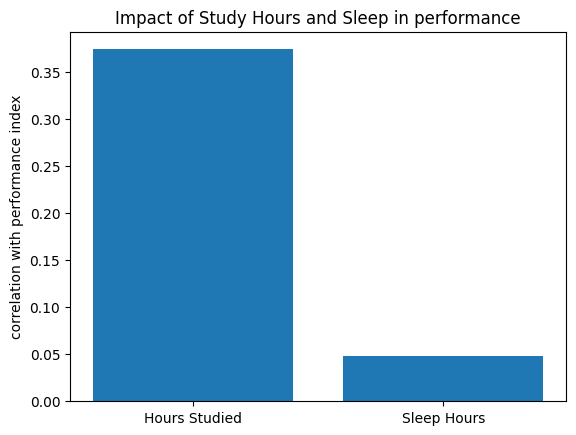

In [76]:
plt.bar(
    ['Hours Studied','Sleep Hours'],
    [study_corr, sleep_corr])
plt.ylabel('correlation with performance index')
plt.title('Impact of Study Hours and Sleep in performance')
plt.show()

In [77]:
less_study = df[df['hours_studied']<=5]
high_study = df[df['hours_studied']>5]

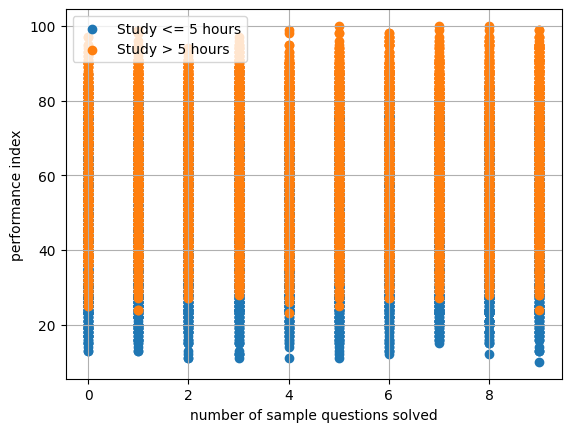

In [86]:
plt.figure()
plt.scatter(
    less_study['sample_question_papers_practiced'],
    less_study['performance_index'], 
    label='Study <= 5 hours'
)
plt.scatter(
    high_study['sample_question_papers_practiced'],
    high_study['performance_index'], 
    label='Study > 5 hours'
)
plt.xlabel('number of sample questions solved')
plt.ylabel('performance index')
plt.grid()
plt.legend(loc='upper left',)
plt.show()

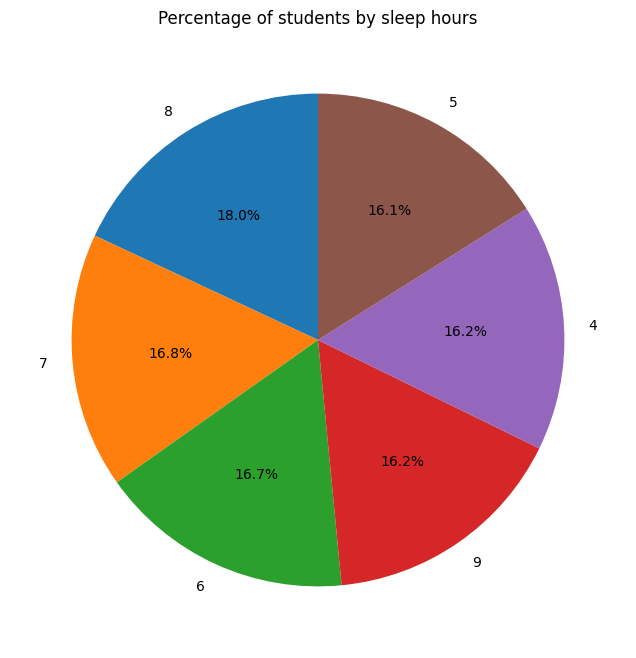

In [99]:
sleep_counts = df['sleep_hours'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sleep_counts, labels= sleep_counts.index, autopct="%.1f%%", startangle=90)
plt.title('Percentage of students by sleep hours')
plt.show()

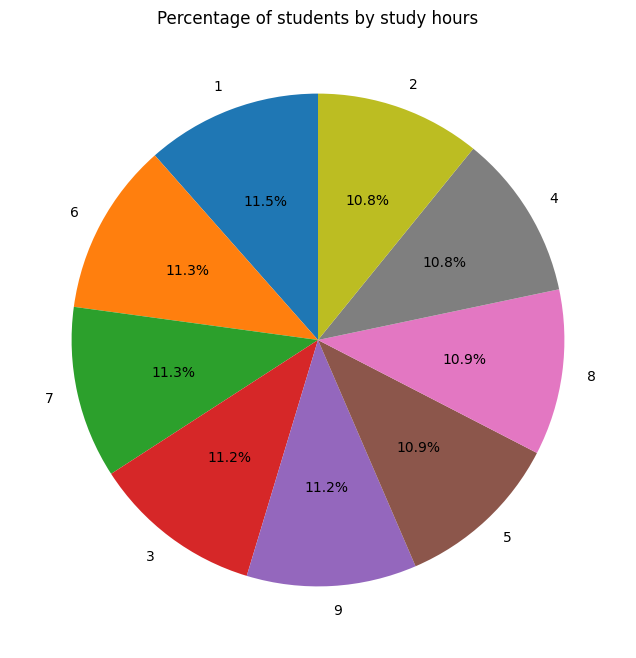

In [103]:
study_hours_count = df['hours_studied'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    study_hours_count, labels = study_hours_count.index, 
    autopct = "%.1f%%", startangle = 90
)
plt.title('Percentage of students by study hours')
plt.show()

In [106]:
df_corr= df.corr(numeric_only=True)
df_corr

,hours_studied,previous_scores,sleep_hours,sample_question_papers_practiced,performance_index
hours_studied,1.000000,-0.012390,0.001245,0.017463,0.373730
previous_scores,-0.012390,1.000000,0.005944,0.007888,0.915189
sleep_hours,0.001245,0.005944,1.000000,0.003990,0.048106
sample_question_papers_practiced,0.017463,0.007888,0.003990,1.000000,0.043268
performance_index,0.373730,0.915189,0.048106,0.043268,1.000000


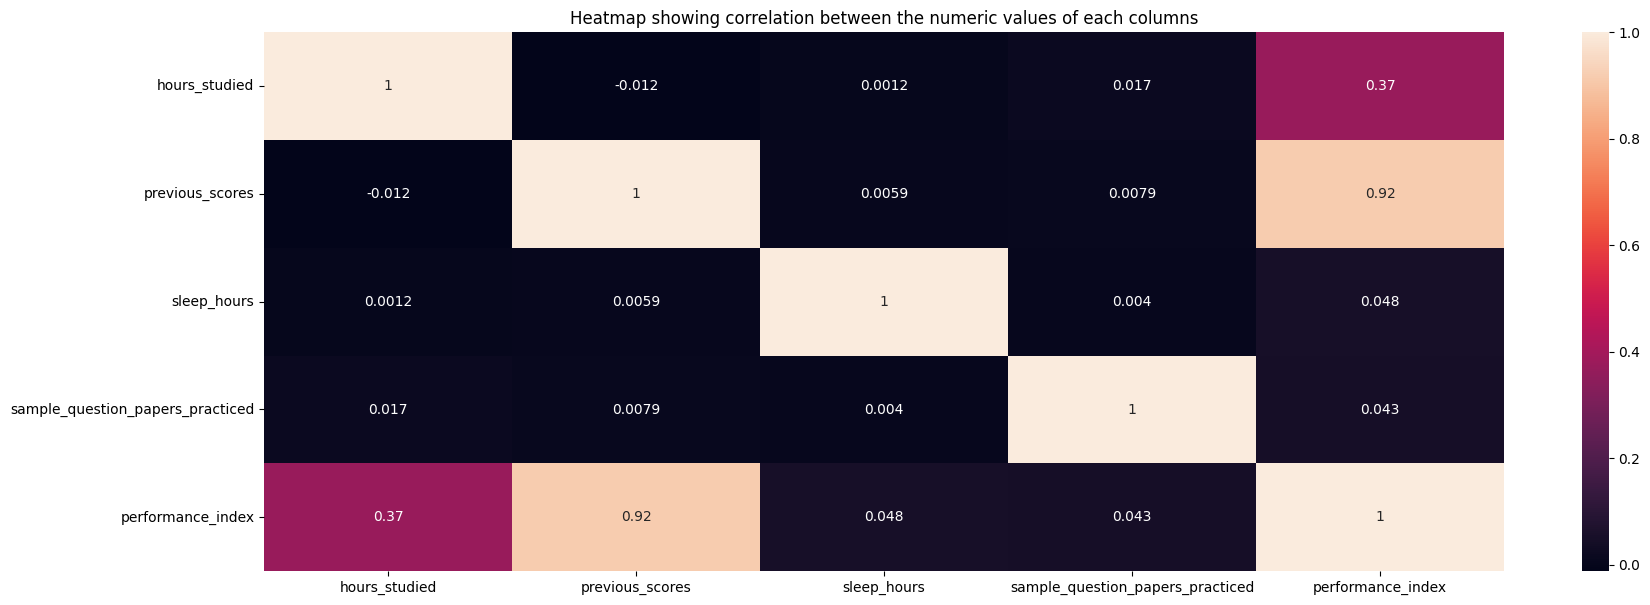

In [112]:
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True)
plt.title('Heatmap showing correlation between the numeric values of each columns')
plt.show()

In [115]:
df.columns

Index(['hours_studied', 'previous_scores', 'extracurricular_activities',
       'sleep_hours', 'sample_question_papers_practiced', 'performance_index'],
      dtype='object')

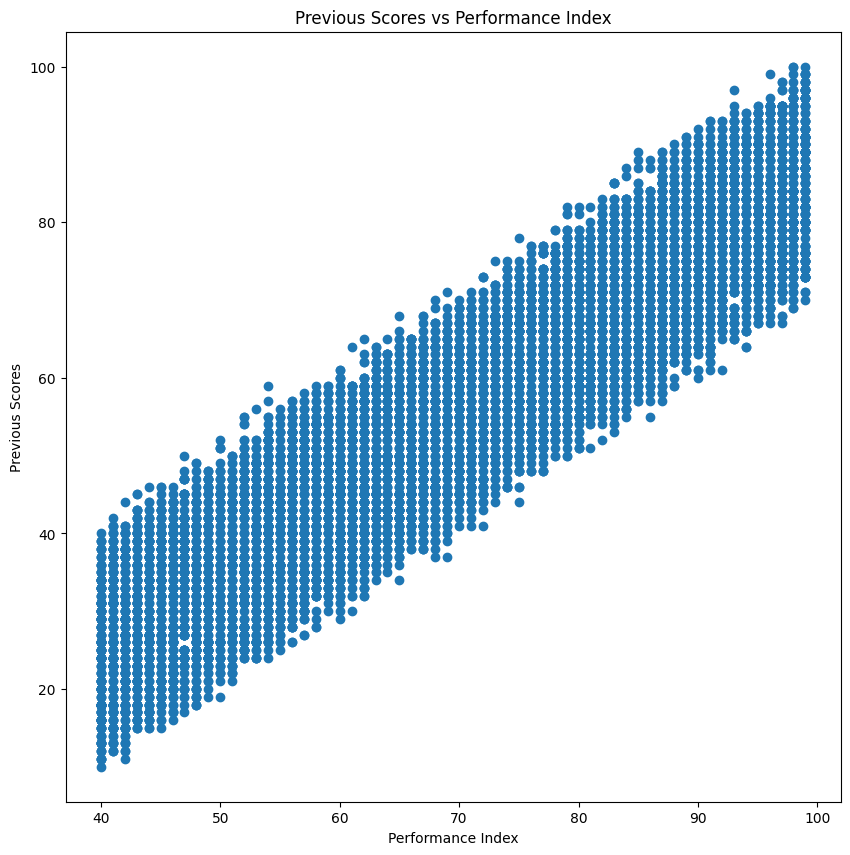

In [122]:
plt.figure(figsize=(10,10))
plt.xlabel('Performance Index')
plt.ylabel('Previous Scores')
plt.title('Previous Scores vs Performance Index')
plt.scatter(df['previous_scores'], df['performance_index'])
plt.show()

#here students with higher previous scores tends to have better perfomance index 

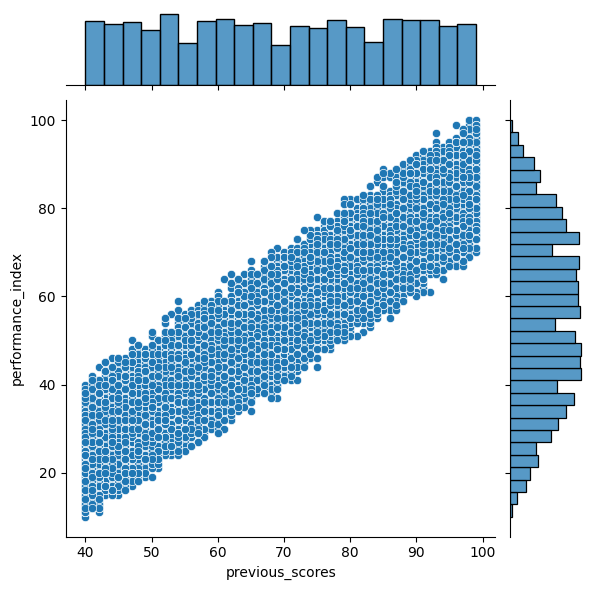

In [124]:
sns.jointplot(df, x=df['previous_scores'], y=df['performance_index'])
plt.show()

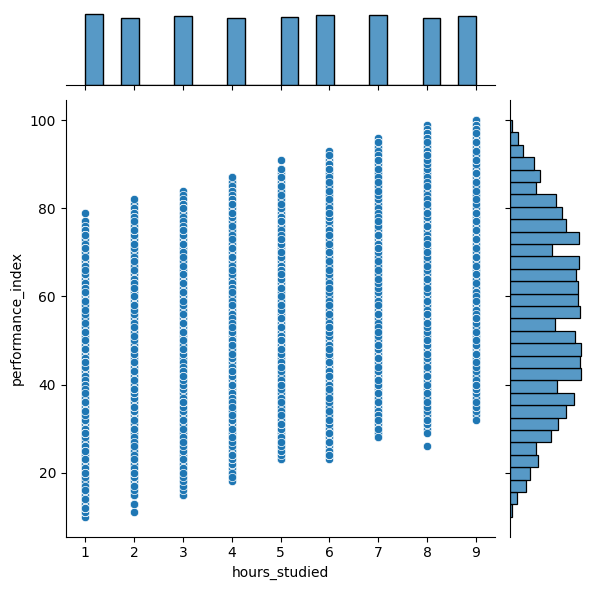

In [127]:
sns.jointplot(df, x=df['hours_studied'], y=df['performance_index'])
plt.show()
# increase in hours studied increase performance index
#Right histogram shows most students performs well and some performs low pulling tail downwards